# STOCK PRICE PREDICTION(Minor project)

In [84]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#importing the dataset to pandas Dataframe : sp_df
import pandas as pd
sp_df=pd.read_excel(r'D:\Users\arifa\Downloads\pro.xlsx')
sp_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500.0
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300.0
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0


In [6]:
#first five rows of the dataframe
sp_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [7]:
#last five rows of the dataframe
sp_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500.0
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300.0
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400.0


In [9]:
#Number of rows and columns in the dataframe
sp_df.shape

(1009, 7)

In [10]:
#row index labels
sp_df.index

RangeIndex(start=0, stop=1009, step=1)

In [11]:
#concise summary of dataframe
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [12]:
#Statistical summary of dataframe
sp_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [13]:
#finding the missing values of dataframe
sp_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
#finding the duplicates records in the dataframe
sp_df.duplicated().sum()

0

In [16]:
#data types of all columns of the dataframe
sp_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

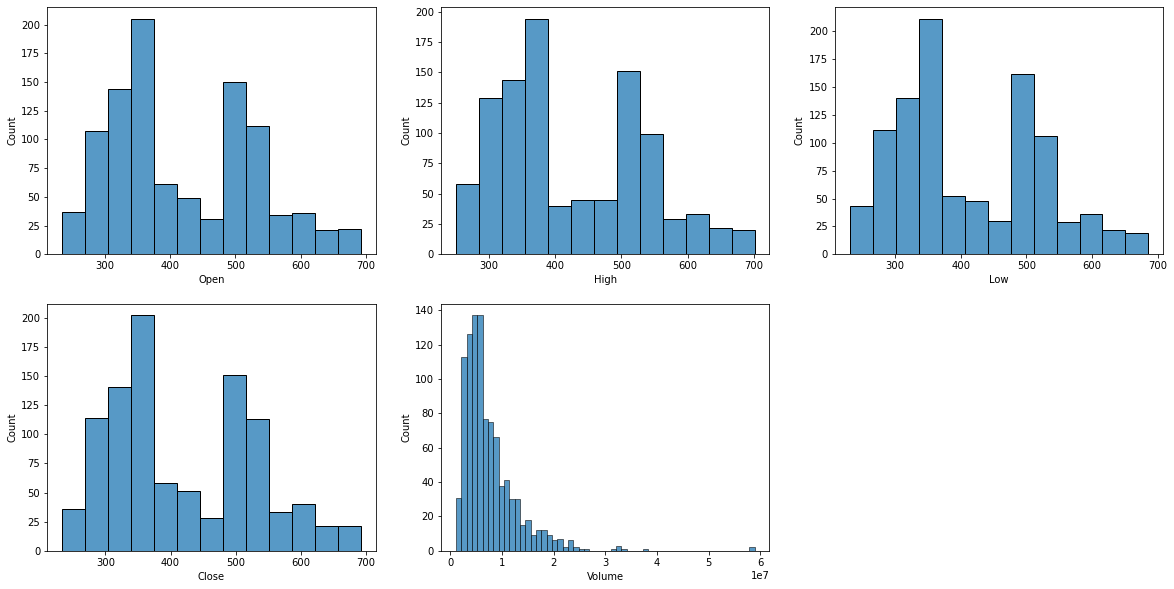

In [37]:
import matplotlib.pyplot as plt
import seaborn as sb
features = ['Open','High','Low','Close','Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.histplot(sp_df[col])
plt.show()

# Feature Engineering

In [47]:
splitted = sp_df['Date'].astype(str).str.split('-', expand=True)
sp_df['day'] = splitted[1].astype('int')
sp_df['month'] = splitted[0].astype('int')
sp_df['year'] = splitted[2].astype('int')
sp_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0,2,2018,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0,2,2018,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0,2,2018,7
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0,2,2018,8
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0,2,2018,9


In [50]:
sp_df['is_quarter_end'] = np.where(sp_df['month']%3==0,1,0)
sp_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0,2,2018,5,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0,2,2018,6,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0,2,2018,7,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0,2,2018,8,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0,2,2018,9,0


In [64]:
sp_df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,448.108608,454.981568,440.919864,448.071555,448.071555,7.315755e+06,6.716235,2019.721692,15.785812
1,341.911595,346.547464,336.562137,341.794528,341.794528,8.247727e+06,6.072464,2019.260870,15.536232


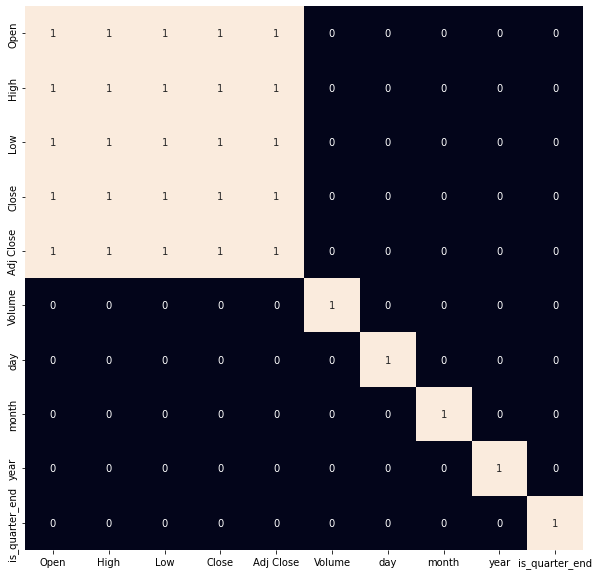

In [68]:
plt.figure(figsize=(10, 10))
sb.heatmap(sp_df.corr() > 0.9, annot=True, cbar=False)
plt.show()

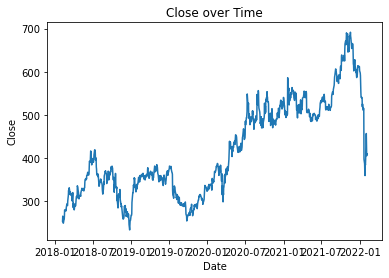

In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Visualize the closing price over time
import matplotlib.pyplot as plt

plt.plot(sp_df['Date'],sp_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close over Time')
plt.show()
